In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [72]:
'''Read the first dataset (diabetes.csv)'''
df = pd.read_csv('diabetes.csv')

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
'''There are 768 strings and 9 columns'''
df.shape

(768, 9)

In [75]:
'''Data description:
   Pregnancies: Number of times pregnant

   Glucose: Plasma glucose concentration a 2 hours in 
an oral glucose tolerance test

   BloodPressure: Diastolic blood pressure (mm Hg)

   SkinThickness: Triceps skin fold thickness (mm)

   Insulin: 2-Hour serum insulin (mu U/ml)

   BMI: Body mass index (weight in kg/(height in m)^2)

   DiabetesPedigreeFunction: Diabetes pedigree function

   Age: Age (years)

   Outcome: Class variable (0 or 1)'''

'Data description:\n   Pregnancies: Number of times pregnant\n\n   Glucose: Plasma glucose concentration a 2 hours in \nan oral glucose tolerance test\n\n   BloodPressure: Diastolic blood pressure (mm Hg)\n\n   SkinThickness: Triceps skin fold thickness (mm)\n\n   Insulin: 2-Hour serum insulin (mu U/ml)\n\n   BMI: Body mass index (weight in kg/(height in m)^2)\n\n   DiabetesPedigreeFunction: Diabetes pedigree function\n\n   Age: Age (years)\n\n   Outcome: Class variable (0 or 1)'

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
'''This data does not contain any null values.'''

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
'''The data doesn't contain any duplicate values also.'''

df.duplicated().sum()

0

In [79]:
'''Look at the features.'''
df.describe().style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


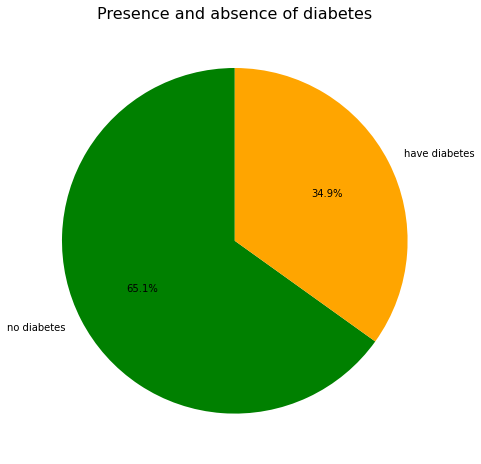

In [82]:
'''Look at the outcome classes. '''

diabetes_count = df['Outcome'].value_counts()

pie_colors = ['green', 'orange']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))

pie = ax.pie(
    diabetes_count,
    labels=['no diabetes', 'have diabetes'],
    colors = pie_colors,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Presence and absence of diabetes',
                     fontsize=16)
plt.show(pie)

In [83]:
'''Classes are not balanced. '''
diabetes_count

0    500
1    268
Name: Outcome, dtype: int64

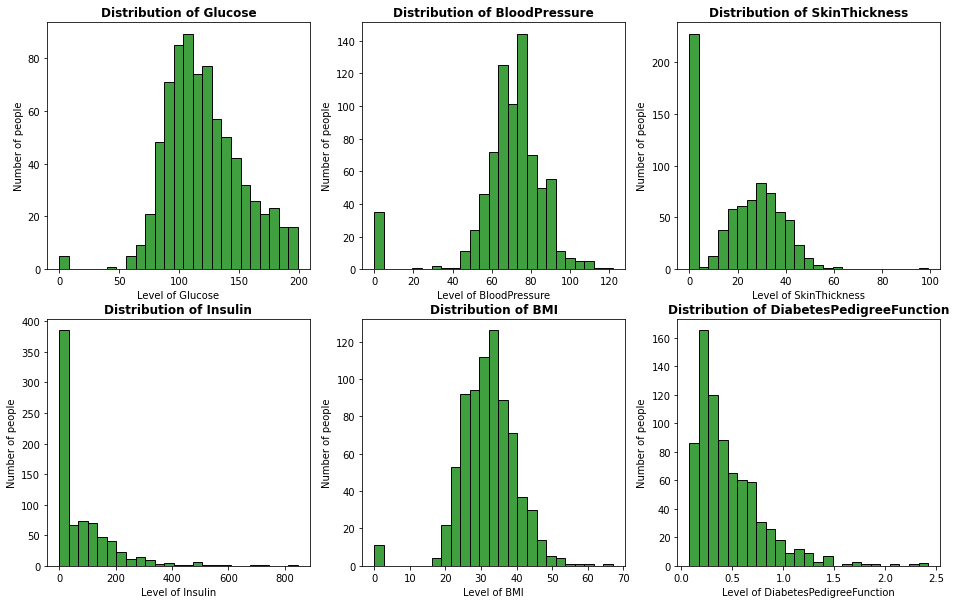

In [84]:
'''Distribution of numerical continuous variables. '''

def histogramming(numerical_features: list, string: int, col: int,
                  df: pd.core.frame.DataFrame, figsize: tuple, 
                  bins: int=25) -> None:
    '''The function prints the histogram of feature.
    Args:
           numerical_features(list): list of numerical features,
           string(int): count of strings in subplots,
           col(int): count of columns in subplots,
           df (pd.core.frame.DataFrame): dataframe,
           figsize(tuple): tuple of sizes of the figure,
           bins(optional, int=25): count of bins
    Returns:
           None '''
    fig, axs = plt.subplots(string, col, figsize=figsize)
    axs = axs.flatten()
    for i, col_name in enumerate(numerical_features):
        sns.histplot(
        data=df,
        x=col_name,
        bins=bins,
        kde=False,
        color='green',
        ax=axs[i]
        );

        axs[i].set_xlabel(f'Level of {col_name}')
        axs[i].set_ylabel('Number of people')
        axs[i].set_title(f'Distribution of {col_name}', 
                         fontsize=12, weight='bold')


numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction']

histogramming(numerical_features=numerical_features, 
              string=2, col=3, df=df, figsize=(16,10))

In [85]:
'''Shapiro-Wilk test.'''

def shapiro_wilk(feature: str, 
                 df: pd.core.frame.DataFrame) -> None:
    '''The function prints the p-value for 
    the Shapiro-Wilk test.
    Args:
           feature (str): name of feature
           df (pd.core.frame.DataFrame): dataframe
    Returns:
           None 
    '''
    stat, p = shapiro(df[feature])
    print(feature, ' p-value ', p)
    
for i in numerical_features:
    shapiro_wilk(i,df)

'''All distributions are different from normal.'''

Glucose  p-value  1.9867612763291298e-11
BloodPressure  p-value  1.5840069624449098e-28
SkinThickness  p-value  1.75157635361056e-21
Insulin  p-value  7.915248149269491e-34
BMI  p-value  1.8405621485603632e-15
DiabetesPedigreeFunction  p-value  2.477696547502535e-27


'All distributions are different from normal.'

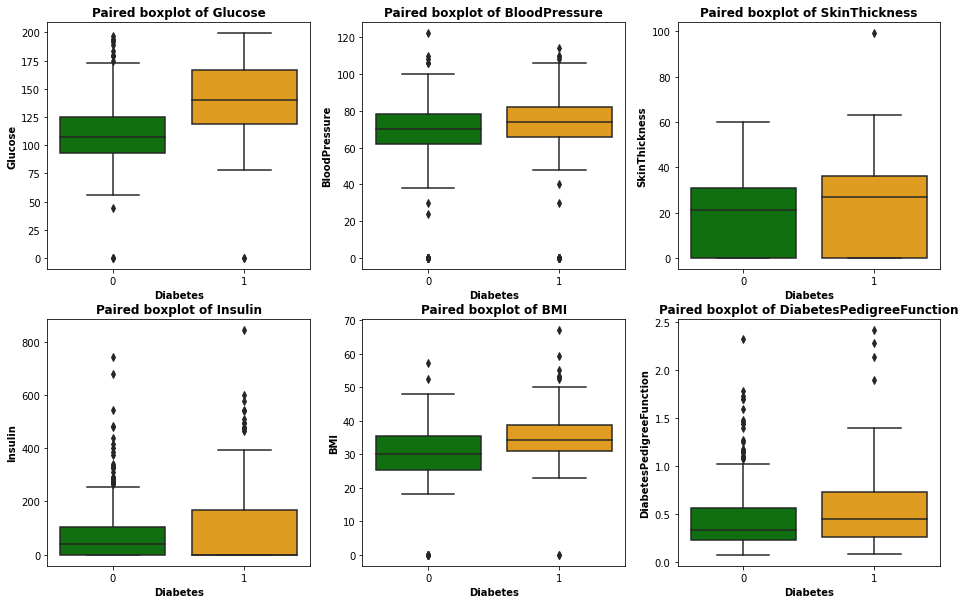

In [86]:
'''Distribution of quantitative variables depending on the outcome. '''

def paired_boxplotting(numerical_features: list, 
                  string: int, col: int, outcome:str,
                  df: pd.core.frame.DataFrame, 
                  figsize: tuple) -> None:
    '''The function prints the paired boxplots of feature
    depending on the outcome.
    Args:
           numerical_features(list): list of numerical features,
           string(int): count of strings in subplots,
           col(int): count of columns in subplots,
           df (pd.core.frame.DataFrame): dataframe,
           figsize(tuple): tuple of sizes of the figure,
           outcome(str): name of outcome
    Returns:
           None '''
    fig, axs = plt.subplots(string, col, figsize=figsize)
    axs = axs.flatten()
    for i, col_name in enumerate(numerical_features):
        sns.boxplot(x=outcome, y=col_name, data=df, 
                    ax=axs[i],  palette = ['green', 'orange'])
        axs[i].set_xlabel("Diabetes", weight = 'bold')
        axs[i].set_ylabel(f"{col_name}", weight='bold')
        axs[i].set_title(f'Paired boxplot of {col_name}',
                         fontsize=12, weight='bold')


paired_boxplotting(numerical_features=numerical_features, string=2,
                   col=3, df=df, figsize=(16,10), outcome='Outcome')

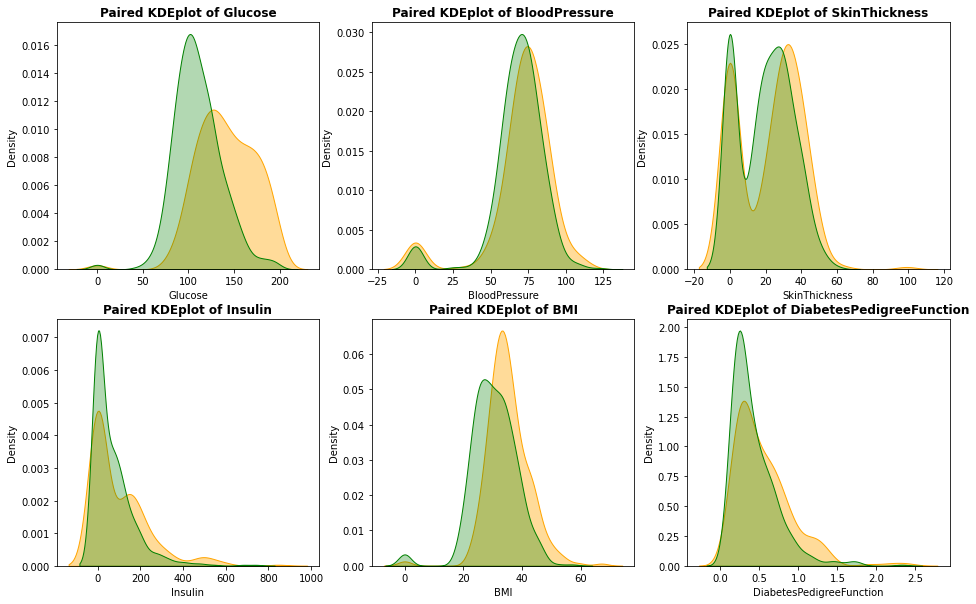

In [87]:
'''KDEplot for quantitative variables'''

fig, axs = plt.subplots(2, 3, figsize=(16,10))
axs = axs.flatten()


for i, col_name in enumerate(numerical_features):
    sns.kdeplot(data=df[df['Outcome']==1], x=col_name,
                ax=axs[i], shade=True, color='orange', alpha=0.4)
    sns.kdeplot(data=df[df['Outcome']==0], x=col_name,
                ax=axs[i], shade=True, color='green', alpha=0.3)
    axs[i].set_xlabel(col_name)
    axs[i].set_title(f'Paired KDEplot of {col_name}',
                     fontsize=12, weight='bold')

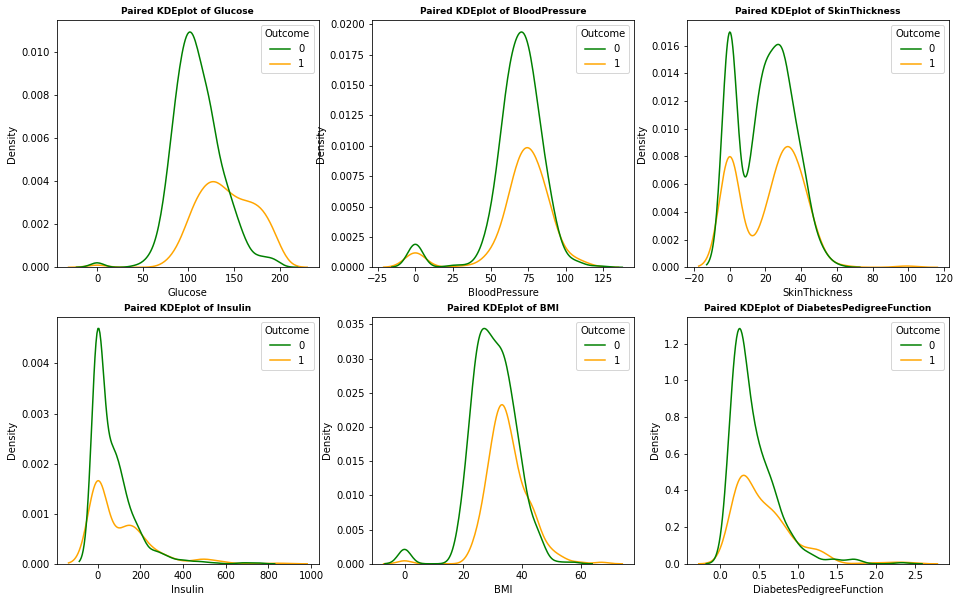

In [16]:
def paired_KDE(numerical_features: list,
                  string: int, col: int, outcome:str,
                  df: pd.core.frame.DataFrame, 
                  figsize: tuple) -> None:
    '''The function prints the paired KDEplots of feature
    depending on the outcome.
    Args:
           numerical_features(list): list of numerical features,
           string(int): count of strings in subplots,
           col(int): count of columns in subplots,
           df (pd.core.frame.DataFrame): dataframe,
           figsize(tuple): tuple of sizes of the figure,
           outcome(str): name of outcome
    Returns:
           None '''
    fig, axs = plt.subplots(string, col, figsize=figsize)
    axs = axs.flatten()
    for i, col_name in enumerate(numerical_features):
        sns.kdeplot(data=df,x=col_name, hue=outcome,
                    ax=axs[i],shade=False,
                    palette=['green','orange'],alpha=1)
        axs[i].set_xlabel(col_name)
        axs[i].set_title(f'Paired KDEplot of {col_name}', 
                         fontsize=9, weight='bold')


paired_KDE(numerical_features=numerical_features, string=2,
           col=3, df=df, figsize=(16,10), outcome='Outcome')

In [88]:
'''Welch's t-test.'''

def welch_test(df, feature:str, outcome:str,
               alpha: int=0.05,
              number: int=1, bonferroni: bool=False)->int:
    '''The function for calculation Welch's t-test.
    Args:
           df (pd.core.frame.DataFrame): dataframe,
           feature(str): name of feature,
           outcome(str): name of outcome,
           alpha(int=0.05, optional): alpha parameter,
           number(int=1, optional): number of features,
           bonferroni(bool=False, optional):
           need for the Bonferroni correction
    Returns:
           p(int): p-value '''
    if bonferroni == True:
        alpha = alpha/number
        print('Alpha after Bonferroni correction = ', alpha)

    data1 = df[df[outcome]==0][feature]
    data2 = df[df[outcome]==1][feature]
    stat, p = ttest_ind(data1, data2, equal_var=False)
    if p > alpha:
        print(f'Same distributions of {feature}(fail to reject H0), p={p}')
    else:
        print(f'Different distributions of {feature} (reject H0), p={p}')
    return p

        
for i in numerical_features:
    welch_test(df=df, feature=i, outcome='Outcome',
                   number=len(numerical_features), bonferroni=True)

'''After applying the Bonferroni correction, statistically
significant differences are visible in the following indicators: 
Glucose, Insulin, BMI, DiabetesPedigreeFunction in two groups
(have diabetes, no diabetes).'''

Alpha after Bonferroni correction =  0.008333333333333333
Different distributions of Glucose (reject H0), p=2.6441613495403223e-36
Alpha after Bonferroni correction =  0.008333333333333333
Same distributions of BloodPressure(fail to reject H0), p=0.08735424821461578
Alpha after Bonferroni correction =  0.008333333333333333
Same distributions of SkinThickness(fail to reject H0), p=0.04935586008648019
Alpha after Bonferroni correction =  0.008333333333333333
Different distributions of Insulin (reject H0), p=0.0010469286528313425
Alpha after Bonferroni correction =  0.008333333333333333
Different distributions of BMI (reject H0), p=6.56623762470833e-17
Alpha after Bonferroni correction =  0.008333333333333333
Different distributions of DiabetesPedigreeFunction (reject H0), p=6.1004814242403285e-06


'After applying the Bonferroni correction, statistically\nsignificant differences are visible in the following indicators: \nGlucose, Insulin, BMI, DiabetesPedigreeFunction in two groups\n(have diabetes, no diabetes).'

'There is no high correlation between the variables.\nMiddle correlation between SkinThickness/Insulin and\nAge/Pregnancies.'

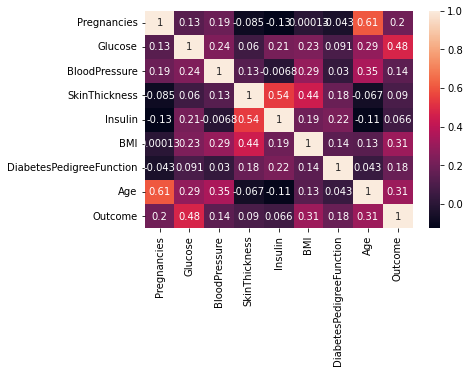

In [89]:
'''Correlation heatmap'''

corr=df.corr(method='spearman')
sns.heatmap(corr, annot=True)

'''There is no high correlation between the variables.
Middle correlation between SkinThickness/Insulin and
Age/Pregnancies.'''

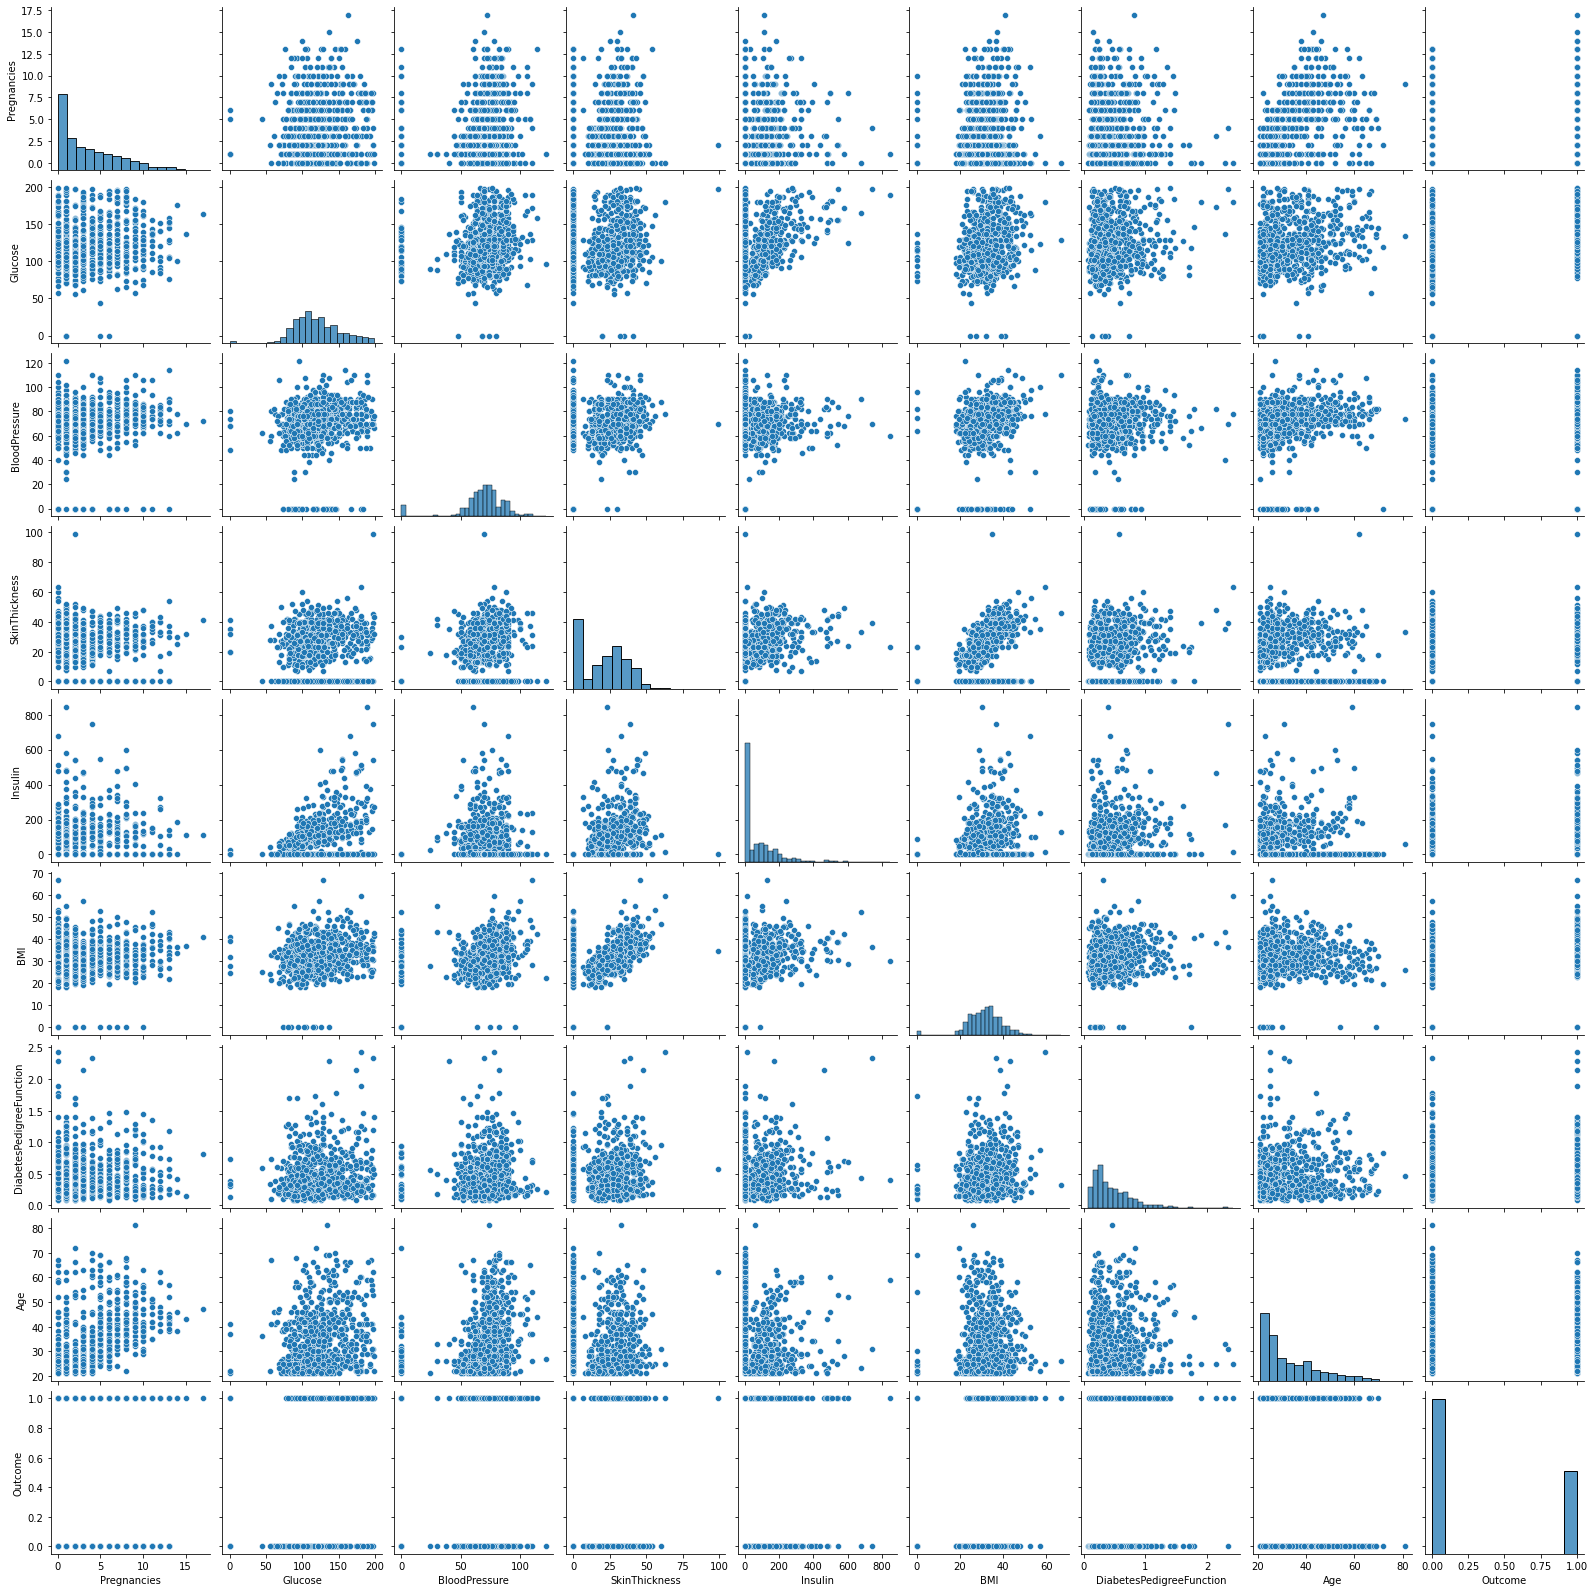

In [90]:
'''Pairplot'''

sns.pairplot(df)

In [91]:
'''Categorical features.
Convert variables to categorical type'''

categorical_features = ['Pregnancies', 'Age', 'Outcome']

df['Pregnancies'] = df['Pregnancies'].astype('category')

df['Outcome'] = df['Outcome'].astype('category')

bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20','30','40', '50', '60', '70', '80']

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

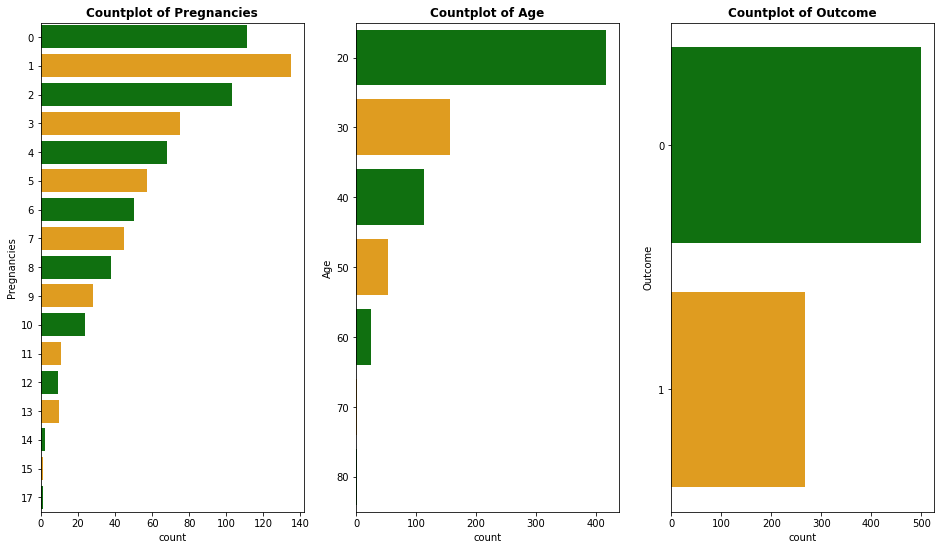

In [92]:
'''Count of categories'''

fig, axs = plt.subplots(1, 3, figsize=(16,9))
axs = axs.flatten()


for i, col_name in enumerate(categorical_features):
    sns.countplot(y=col_name,data=df,ax=axs[i],
                 palette = ['green', 'orange'])

    axs[i].set_ylabel(col_name)
    axs[i].set_title(f'Countplot of {col_name}',
                     fontsize=12, weight='bold')

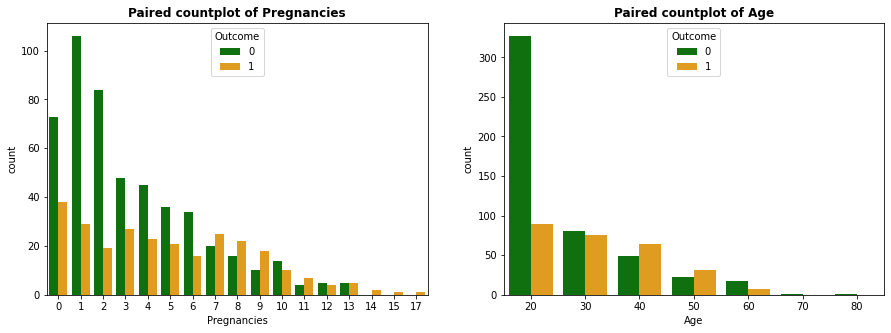

In [93]:
'''Count of categories depending on the outcome.

With increasing age and the number of pregnancies, 
the number of diabetic patients becomes more than 
those who are healthy from diabetes'''

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs = axs.flatten()


for i, col_name in enumerate(['Pregnancies', 'Age']):
    sns.countplot(x=col_name,data=df, orient='v', hue='Outcome',
                  ax=axs[i], palette=['green', 'orange'])

    axs[i].set_xlabel(col_name)
    axs[i].set_title(f'Paired countplot of {col_name}',
                     fontsize=12, weight='bold')

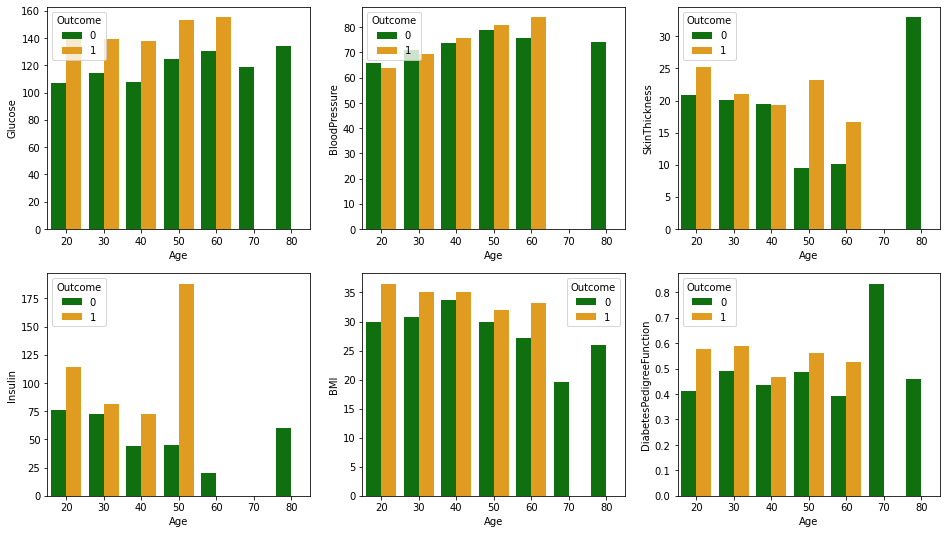

In [94]:
'''Numerical features by age and outcome.

With increasing age, glucose levels increase,
in diabetic patients much more significantly.

With increasing age, blood pressure increase, 
in diabetic patients more.

In patients over 50 years old, the thickness 
of the skin is higher, compared with healthy people.

The maximum level of insulin is observed in patients
with diabetes at the age of 50 years.

The body mass index and pedigree function are
higher in patients with diabetes of any age.
'''

fig, axs = plt.subplots(2, 3, figsize=(16,9))
axs = axs.flatten()

for i, col_name in enumerate(numerical_features):
    sns.barplot(
    data=df,
    x='Age',
    y=col_name,
    orient='v',
    ax=axs[i],
    hue='Outcome',
    ci=None,
    palette=['green', 'orange']
)

In [95]:
'''Add new data.'''

df_2 = pd.read_csv('train.csv')
df_3 = pd.read_csv('test.csv')

In [96]:
'''Data Description
Demographic:
• Sex: male or female("M" or "F")
• Age: Age of the patient;(Continuous - Although the
recorded ages have been truncated to whole numbers, 
the concept of age is continuous)
Behavioral
• is_smoking: whether or not the patient is a
current smoker ("YES" or "NO")
• Cigs Per Day: the number of cigarettes that the
person smoked on average in one day.(can be considered
continuous as one can have any number of cigarettes,
even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood
pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had
previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was 
hypertensive (Nominal)
• Diabetes: whether or not the patient had 
diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical 
research, variables such as heart rate though in fact 
discrete, yet are considered continuous because of 
large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD
(binary: “1”, means “Yes”, “0” means “No”)'''

'Data Description\nDemographic:\n• Sex: male or female("M" or "F")\n• Age: Age of the patient;(Continuous - Although the\nrecorded ages have been truncated to whole numbers, \nthe concept of age is continuous)\nBehavioral\n• is_smoking: whether or not the patient is a\ncurrent smoker ("YES" or "NO")\n• Cigs Per Day: the number of cigarettes that the\nperson smoked on average in one day.(can be considered\ncontinuous as one can have any number of cigarettes,\neven half a cigarette.)\nMedical( history)\n• BP Meds: whether or not the patient was on blood\npressure medication (Nominal)\n• Prevalent Stroke: whether or not the patient had\npreviously had a stroke (Nominal)\n• Prevalent Hyp: whether or not the patient was \nhypertensive (Nominal)\n• Diabetes: whether or not the patient had \ndiabetes (Nominal)\nMedical(current)\n• Tot Chol: total cholesterol level (Continuous)\n• Sys BP: systolic blood pressure (Continuous)\n• Dia BP: diastolic blood pressure (Continuous)\n• BMI: Body Mass In

In [97]:
'''Concate new datasets.'''

df_4 = pd.concat([df_2, df_3], ignore_index=True)

In [98]:
'''There are 4238 strings and 17 columns'''
print(df_4.shape)
df_4.head()

(4238, 17)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [99]:
'''Select the necessary columns in 
the first dataset (df) and rename them'''

df_reduced = df.loc[:, ['Glucose', 'BloodPressure',
            'BMI', 'Age', 'Outcome']]\
            .rename(columns={'Outcome':'Diabetes'})

In [100]:
df_reduced.head()

,Glucose,BloodPressure,BMI,Age,Diabetes
0,148,72,33.6,40,1
1,85,66,26.6,30,0
2,183,64,23.3,30,1
3,89,66,28.1,20,0
4,137,40,43.1,30,1


In [101]:
'''Select the necessary columns in 
the second dataset (df_4) and rename them'''

df_4_reduced = df_4.loc[:, ['age', 'diabetes',
              'diaBP', 'BMI', 'glucose']]\
              .rename(columns={'age': 'Age',
              'diabetes': 'Diabetes', 'diaBP': 'BloodPressure',
               'glucose': 'Glucose'})

In [102]:
df_4_reduced.head()

,Age,Diabetes,BloodPressure,BMI,Glucose
0,64,0,85.0,NaN,80.0
1,36,0,98.0,29.77,75.0
2,46,0,71.0,20.35,94.0
3,50,0,88.0,28.26,94.0
4,64,0,85.0,26.42,77.0


In [103]:
df_4_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            4238 non-null   int64  
 1   Diabetes       4238 non-null   int64  
 2   BloodPressure  4238 non-null   float64
 3   BMI            4219 non-null   float64
 4   Glucose        3850 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 165.7 KB


In [104]:
'''Convert variables to categorical type'''

df_4_reduced['Diabetes'] = df_4_reduced['Diabetes']\
                          .astype('category')


bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20','30','40', '50', '60', '70', '80']

df_4_reduced['Age'] = pd.cut(df_4_reduced['Age'], bins=bins,
                             labels=labels)

In [105]:
'''This data contains some null values.'''

df_4_reduced.isnull().sum()

Age                0
Diabetes           0
BloodPressure      0
BMI               19
Glucose          388
dtype: int64

In [106]:
print('BMI % of NaN: ', df_4_reduced['BMI']\
      .isnull().mean()*100)
print('Glucose % of NaN: ', df_4_reduced['Glucose']\
      .isnull().mean()*100)

BMI % of NaN:  0.4483246814535158
Glucose % of NaN:  9.155261915998112


In [107]:
'''Drop strings with NaN values'''

df_4_reduced.dropna(how='any', inplace=True)

df_4_reduced.isnull().sum()

Age              0
Diabetes         0
BloodPressure    0
BMI              0
Glucose          0
dtype: int64

In [108]:
'''The data contains two duplicate values.
Duplicates will be droped.'''

df_4_reduced.duplicated().sum()

2

In [109]:
df_4_reduced.drop_duplicates(inplace=True,
                             ignore_index=True)

df_4_reduced.duplicated().sum()

0

In [110]:
'''Concatenate two datasests.'''

data = pd.concat([df_reduced, df_4_reduced],
                 ignore_index = True)

In [111]:
'''New dataset (data) has 4602 strings and 5 columns'''
data.shape

(4602, 5)

In [112]:
data.head()

,Glucose,BloodPressure,BMI,Age,Diabetes
0,148.0,72.0,33.6,40,1
1,85.0,66.0,26.6,30,0
2,183.0,64.0,23.3,30,1
3,89.0,66.0,28.1,20,0
4,137.0,40.0,43.1,30,1


In [113]:
'''There are people with BMI=0,
most likely these are outliers'''

data.describe().style.background_gradient()

,Glucose,BloodPressure,BMI
count,4602.000000,4602.000000,4602.000000
mean,88.435028,80.630487,26.841345
std,29.177633,14.435757,5.427129
min,0.000000,0.000000,0.000000
25%,73.000000,72.500000,23.402500
50%,81.000000,80.000000,25.970000
75%,94.000000,88.000000,29.197500
max,394.000000,142.500000,67.100000


In [114]:
'''Drop outliers'''

data = data.drop(data[data['BMI']==0].index, axis=0)

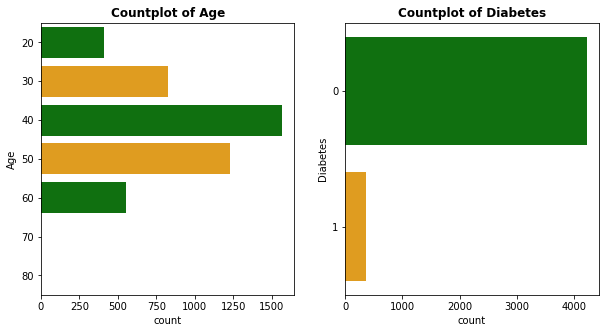

In [115]:
'''Count of categories.

The classes of Diabetes are higly imbalanced.'''

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.flatten()


for i, col_name in enumerate(['Age', 'Diabetes']):
    sns.countplot(y=col_name, data=data, ax=axs[i],
                  palette = ['green', 'orange'])
    
    axs[i].set_ylabel(col_name)
    axs[i].set_title(f'Countplot of {col_name}',
                     fontsize=12, weight='bold')

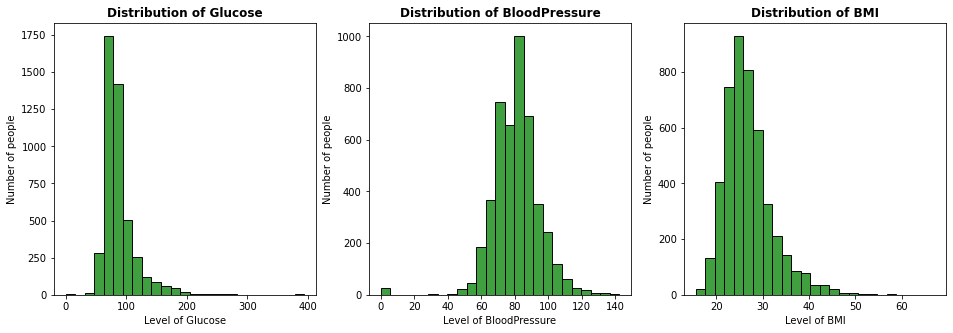

In [116]:
'''Distribution of numerical continuous variables. '''

numerical_features = ['Glucose', 'BloodPressure', 'BMI']

histogramming(numerical_features=numerical_features,
              string=1, col=3, df=data, figsize=(16,5))

In [117]:
for i in numerical_features:
    shapiro_wilk(i,data)

'''All distributions are different from normal.'''

Glucose  p-value  0.0
BloodPressure  p-value  1.554039996936222e-42
BMI  p-value  1.961817850054744e-44


'All distributions are different from normal.'

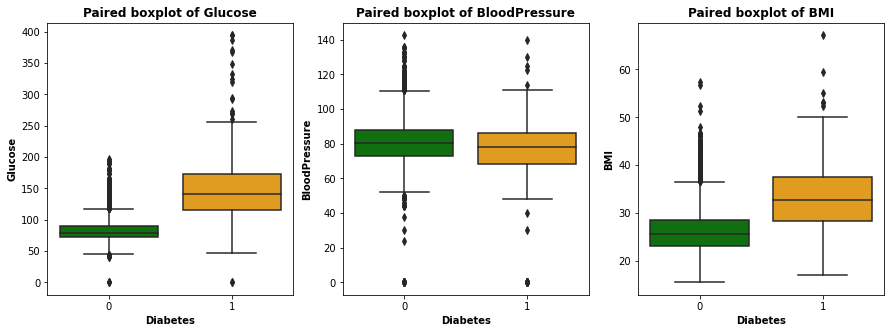

In [118]:
'''Distribution of quantitative variables 
depending on the outcome (diabetes). '''

paired_boxplotting(numerical_features=numerical_features,
                   string=1, col=3, df=data,
                   figsize=(15,5), outcome='Diabetes')

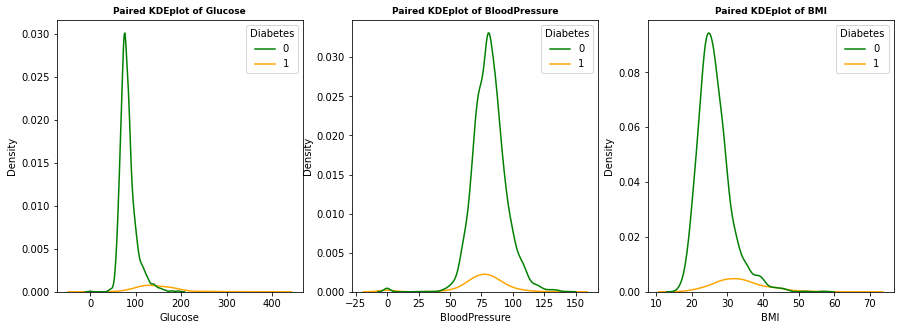

In [119]:
paired_KDE(numerical_features=numerical_features,
           string=1, col=3, df=data, figsize=(15,5),
           outcome='Diabetes')

In [120]:
'''Welch's t-test.'''

for i in numerical_features:
    welch_test(df=data, feature=i, outcome='Diabetes',
                   number=len(numerical_features), 
                   bonferroni=True)

'''After applying the Bonferroni correction, statistically
significant differences are visible in the following features:
Glucose, BMI, BloodPressure in two groups
(have diabetes, no diabetes).'''

Alpha after Bonferroni correction =  0.016666666666666666
Different distributions of Glucose (reject H0), p=9.610260762647195e-77
Alpha after Bonferroni correction =  0.016666666666666666
Different distributions of BloodPressure (reject H0), p=1.284038677262868e-07
Alpha after Bonferroni correction =  0.016666666666666666
Different distributions of BMI (reject H0), p=2.0588204940470605e-56


'After applying the Bonferroni correction, statistically\nsignificant differences are visible in the following features:\nGlucose, BMI, BloodPressure in two groups\n(have diabetes, no diabetes).'

'There is no high correlation between the variables.'

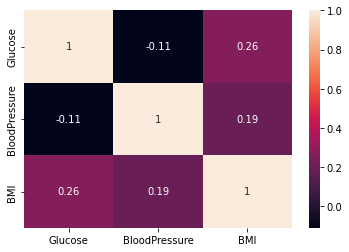

In [121]:
'''Correlation heatmap'''

corr=data.corr(method='spearman')
sns.heatmap(corr, annot=True)

'''There is no high correlation between the variables.'''

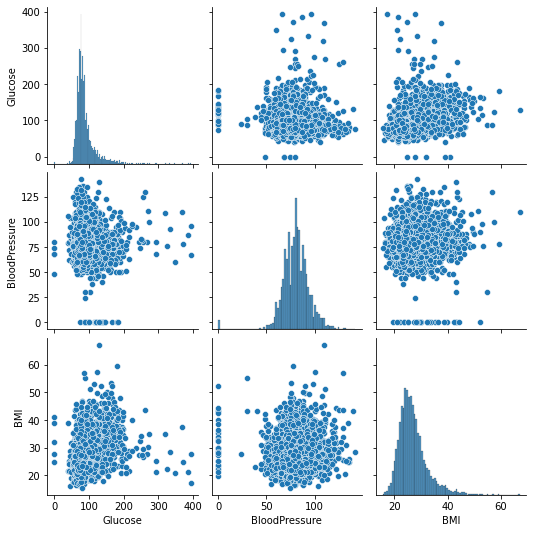

In [122]:
'''Pairplot'''

sns.pairplot(data)

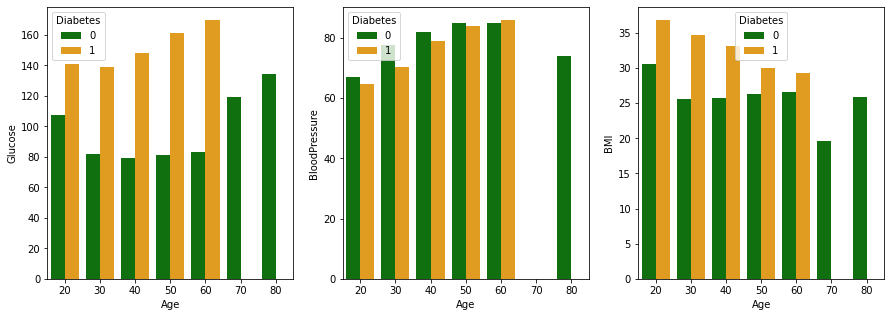

In [123]:
'''Numerical features by age and outcome.

With increasing age, glucose levels increase, 
in diabetic patients much more significantly.

With increasing age, blood pressure increase, 
in both groups.

The body mass index is higher in patients 
with diabetes of any age.
'''

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs = axs.flatten()

for i, col_name in enumerate(numerical_features):
    sns.barplot(
    data=data,
    x='Age',
    y=col_name,
    orient='v',
    ax=axs[i],
    hue='Diabetes',
    ci=None,
    palette=['green', 'orange']
)

In [124]:
'''Add new data.
Since next I have to work mainly with 
categorical variables, a dataset with 
balanced classes is selected.'''

df_5 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [125]:
df_5.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [126]:
'''This dataset has 70692 strings and 22 columns.'''
df_5.shape

(70692, 22)

In [127]:
'''The data contains 1635 duplicate values.
Duplicates will be droped.'''

df_5.duplicated().sum()

1635

In [128]:
df_5.drop_duplicates(inplace=True, ignore_index=True)

df_5.duplicated().sum()

0

In [129]:
'''Select the necessary columns in 
the third dataset (df_5) and rename them'''

df_5_reduced = df_5.loc[:, ['Age', 'Diabetes_binary',
              'HighBP', 'BMI']]\
              .rename(columns={'Diabetes_binary': 'Diabetes',
                               'HighBP': 'BloodPressure'})

In [130]:
df_5_reduced.head()

,Age,Diabetes,BloodPressure,BMI
0,4.0,0.0,1.0,26.0
1,12.0,0.0,1.0,26.0
2,13.0,0.0,0.0,26.0
3,11.0,0.0,1.0,28.0
4,8.0,0.0,0.0,29.0


In [131]:
df_5_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69057 entries, 0 to 69056
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            69057 non-null  float64
 1   Diabetes       69057 non-null  float64
 2   BloodPressure  69057 non-null  float64
 3   BMI            69057 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


In [132]:
'''Convert columns in both datasets (data and 
df_5 reduced)'''

df_5_reduced = df_5_reduced.astype('int')

data['BloodPressure'] = data['BloodPressure']\
                       .map(lambda x: 1 if x>90 else 0)\
                       .astype('category')

bins = [0, 2, 4, 6, 8, 10, 12, 13]

labels = ['20','30','40', '50', '60', '70', '80']

df_5_reduced['Age'] = pd.cut(df_5_reduced['Age'],
                             bins=bins, labels=labels)

df_5_reduced['Diabetes'] = df_5_reduced['Diabetes']\
                           .astype('category')

df_5_reduced['BloodPressure'] = df_5_reduced['BloodPressure']\
                               .astype('category')

In [133]:
'''Concatenate two datasests.'''

data_res = pd.concat([data[['BloodPressure', 'BMI',
                            'Age', 'Diabetes']], df_5_reduced],
                     ignore_index = True)

In [134]:
data_res.head()

,BloodPressure,BMI,Age,Diabetes
0,0,33.6,40,1
1,0,26.6,30,0
2,0,23.3,30,1
3,0,28.1,20,0
4,0,43.1,30,1


In [135]:
data_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73648 entries, 0 to 73647
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   BloodPressure  73648 non-null  category
 1   BMI            73648 non-null  float64 
 2   Age            73648 non-null  category
 3   Diabetes       73648 non-null  category
dtypes: category(3), float64(1)
memory usage: 791.9 KB


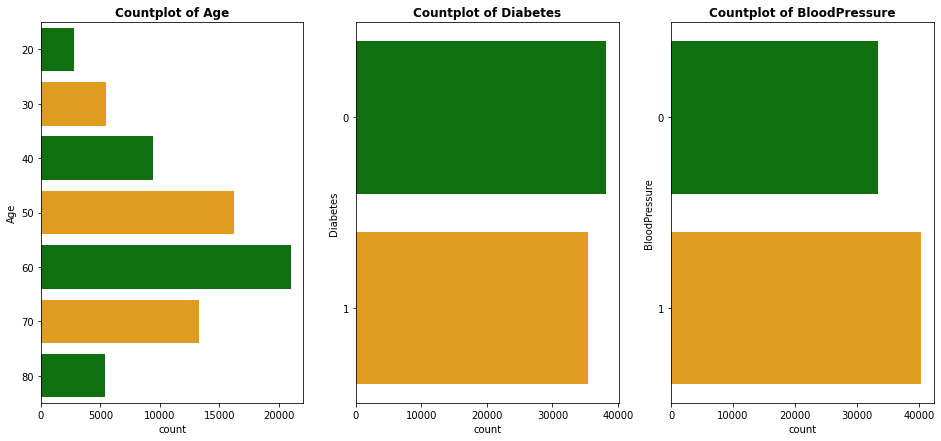

In [136]:
'''Count of categories.

The classes of Diabetes are balanced.'''

fig, axs = plt.subplots(1, 3, figsize=(16,7))
axs = axs.flatten()

for i, col_name in enumerate(['Age', 'Diabetes', 'BloodPressure']):
    sns.countplot(y=col_name, data=data_res,
                  ax=axs[i], palette = ['green', 'orange'])
    
    axs[i].set_ylabel(col_name)
    axs[i].set_title(f'Countplot of {col_name}', fontsize=12, weight='bold')

Text(0.5, 1.0, 'Histogram of BMI')

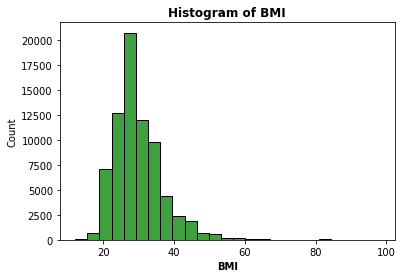

In [137]:
'''Distribution of numerical continuous variable - BMI. '''

hist = sns.histplot(
        data=data_res,
        x='BMI',
        bins=25,
        kde=False,
        color='green'
        );
hist.set_xlabel("BMI", weight = 'bold')
hist.set_title('Histogram of BMI', fontsize=12, weight='bold')

Text(0.5, 1.0, 'Paired boxplot of BMI')

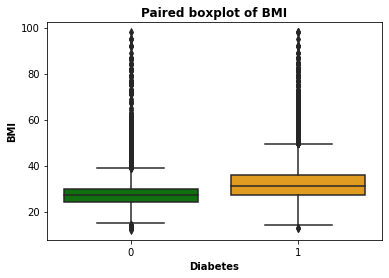

In [138]:
'''Boxplot of BMI'''

boxplot = sns.boxplot(x='Diabetes', y='BMI',
                      data=data_res,
                     palette = ['green', 'orange'])
boxplot.set_xlabel("Diabetes", weight = 'bold')
boxplot.set_ylabel("BMI", weight='bold')
boxplot.set_title('Paired boxplot of BMI',
                  fontsize=12, weight='bold')

In [139]:
'''Welch's t-test.'''

welch_test(df=data_res, feature='BMI', outcome='Diabetes')

'''Statistically significant difference in the BMI
in two groups (have diabetes, no diabetes).'''

Different distributions of BMI (reject H0), p=0.0


'Statistically significant difference in the BMI\nin two groups (have diabetes, no diabetes).'

Text(0.5, 1.0, 'Barplot of BMI, Age and Diabetes')

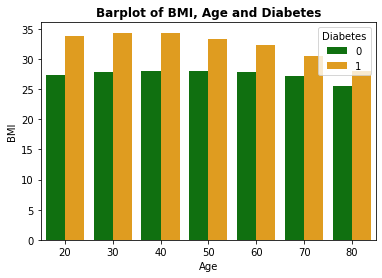

In [140]:
'''Body mass index is higher in diabetic 
patients at any age.'''

barplot_1 = sns.barplot(
          data=data_res,
          x='Age',
          y='BMI',
          orient='v',
          hue='Diabetes',
          ci=None,
          palette=['green', 'orange']
    )
barplot_1.set_title('Barplot of BMI, Age and Diabetes',
                    fontsize=12, weight='bold')

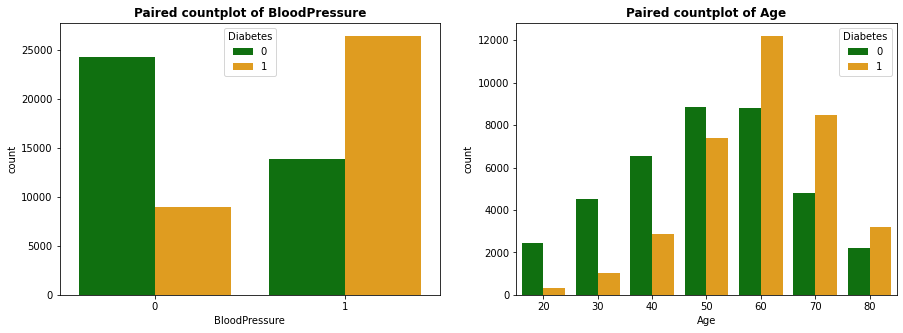

In [141]:
'''There are more healthy people among 
people with normal blood pressure.

There are more diabetic patients among 
people with high blood pressure.

With age, the number of diabetic patients 
increases, at the age of 60 the number is maximum.
'''

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs = axs.flatten()


for i, col_name in enumerate(['BloodPressure', 'Age']):
    sns.countplot(x=col_name,data=data_res, orient='v',
                  hue='Diabetes', 
                  ax=axs[i], palette=['green', 'orange'])

    axs[i].set_xlabel(col_name)
    axs[i].set_title(f'Paired countplot of {col_name}',
                     fontsize=12, weight='bold')

In [ ]:
'''Conclusion.
When analyzing all three datasets, 
similar results were obtained.

The most important factors in diabetes:
glucose, age, insulin, BMI, diabetes pedigree 
function, blood pressure.

In these datasets there is no division into 
different types of diabetes 
(first, second, diabetes of pregnant women),
therefore the results are general.'''